Notes - CSC 722: 11/09/2022

&emsp; Version 1.0<br> 
&emsp; October 2022

&emsp; CSC 722<br>
&emsp; Machine Learning Fundamentals<br>
&emsp; Dakota State University

Kiera Conway

--------

## Import Libraries

In [1]:
import numpy as np   # array mathematical operations library
import pandas as pd  # data analysis library

## Input Data

In [2]:
# Set File Path
file_path = '/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv'

# Obtain Data from File Path
data = pd.read_csv(file_path)

### Review Dataset

In [3]:
# General Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
# View first 5 Observations
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
# Statistical Information
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## Create Mappers
### Dictionary Method

In [6]:
# Observe Unique Values
print(data.Sex.unique())
print(data.BP.unique())
print(data.Cholesterol.unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']


### Mapping Transition

Now that we know the unique values for each feature, we can create mappers to replace the data with numerical representation. The transitions are listed below

* **Sex**
    * F &ensp;-&ensp; 0
    * M &ensp;-&ensp; 1
* **Blood Pressure**
    * Low   &ensp;-&ensp; 0
    * Normal &ensp;-&ensp; 1
    * High   &ensp;-&ensp; 2
* **Cholesterol**
    * Normal &ensp;-&ensp; 1
    * High   &ensp;-&ensp; 2

In [7]:
# Create Mapping Dictionaries
scale_mapper = {"LOW":0, "NORMAL": 1, "HIGH":2}
scale_sex = {"F":0, "M": 1}

# Execute In-Place Mapping
data['Sex'].replace(scale_sex, inplace=True)
data['BP'].replace(scale_mapper, inplace=True) 
data['Cholesterol'].replace(scale_mapper, inplace=True)

# View New Data
data.describe()

,Age,Sex,BP,Cholesterol,Na_to_K
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,1.065000,1.515000,16.084485
std,16.544315,0.500854,0.839224,0.501029,7.223956
min,15.000000,0.000000,0.000000,1.000000,6.269000
25%,31.000000,0.000000,0.000000,1.000000,10.445500
50%,45.000000,1.000000,1.000000,2.000000,13.936500
75%,58.000000,1.000000,2.000000,2.000000,19.380000
max,74.000000,1.000000,2.000000,2.000000,38.247000


### Class Method

In [8]:
# Observe Unique Values
print(data.Drug.unique())

['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [9]:
# Execute In-Place Mapping
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  # Create Instance
data['Drug'] = le.fit_transform(data['Drug'])


# View New Data
data.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,1.065000,1.515000,16.084485,2.870000
std,16.544315,0.500854,0.839224,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,1.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,1.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,2.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,2.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,2.000000,38.247000,4.000000


In [10]:
# Identify Mapping 
le.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

### Mapping Transition

By accessing the le instance, we can view the position of each drug and determine their numerical representations. This mapping transition is listed below

* **Drugs**
    * drugA    &ensp;-&ensp; 0
    * drugB    &ensp;-&ensp; 1
    * drugC    &ensp;-&ensp; 2
    * drugX    &ensp;-&ensp; 3
    * drugY    &ensp;-&ensp; 4

## Train Classifier

### Define Variables

In [11]:
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K' ]]  #define feature set
y = data['Drug']                                           #define dependent variable

print(X.shape)       #print shape (Observations/ Rows, Features/ Columns)
print(y.shape)       #print shape (Observations/ Rows, Features/ Columns)

(200, 5)
(200,)


### Split Training and Testing Data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Fit Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42) #Create Instance
model = dt.fit(X_train, y_train)

## Determine Model Metrics
### Create Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(X_test)

print(y_test.head())    #print true data
print(pred[0:5])        #print predictions

print()
print(confusion_matrix(y_test, pred)) #cm(true data, predictions)
print(accuracy_score(y_test, pred))   #am(true data, predictions)

95     3
15     4
30     3
158    2
128    4
Name: Drug, dtype: int64
[3 4 3 2 4]

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 15  0]
 [ 0  0  0  0 20]]
1.0


### Confusion Matrix Analysis


|                 | Predicted Value<br>[0] | Predicted Value<br>[1] |
| --------------- | ---------------------- | ---------------------- |
| True Value [0]  | Prediction Correct     | Prediction Incorrect   |
| True Value [1]  | Prediction Incorrect   | Prediction Correct     |

P = Prediction<br>
T = True Value


| P, T | 0           | 1           |
| ---- | ----------- | ----------- |
| 0    | <b>0, 0</b> | 0, 1        |
| 1    | 1, 0        | <b>1, 1</b> |


Using our data:


|         	| P drugA	| P drugB	| P drugC	| P drugX	| P drugY	|
| ----------| ----------| ----------| ----------| ----------| ----------|
|T drugA	|***6***	|0			|0			|0			|0			|
|T drugB	|0			|***3***	|0			|0			|0			|
|T drugC	|0			|0			|***6***	|0			|0			|
|T drugX	|0			|0			|0			|***15***	|0			|
|T drugY	|0			|0			|0			|0			|***20***	|


The italicized values that go diagonal across the table are instances where the predictions were correct. For example, there were 6 instances where drugA was correctly predicted, 3 instances where drugB was correctly predicted, etc.

## Analyze with Entropy
### Refit Model

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42, criterion = 'entropy') #Create Instance
model = dt.fit(X_train, y_train)

### Recreate Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(X_test)

print(y_test.head())    #print true data
print(pred[0:5])        #print predictions

print()
print(confusion_matrix(y_test, pred)) #cm(true data, predictions)
print(accuracy_score(y_test, pred))   #am(true data, predictions)

95     3
15     4
30     3
158    2
128    4
Name: Drug, dtype: int64
[3 4 3 2 4]

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 15  0]
 [ 0  0  0  0 20]]
1.0


## Visualize Tree

[Text(0.6666666666666666, 0.9, 'Na_to_K <= 14.829\nentropy = 1.938\nsamples = 150\nvalue = [17, 13, 10, 39, 71]'),
 Text(0.5555555555555556, 0.7, 'BP <= 1.5\nentropy = 1.786\nsamples = 79\nvalue = [17, 13, 10, 39, 0]'),
 Text(0.3333333333333333, 0.5, 'BP <= 0.5\nentropy = 0.73\nsamples = 49\nvalue = [0, 0, 10, 39, 0]'),
 Text(0.2222222222222222, 0.3, 'Cholesterol <= 1.5\nentropy = 0.998\nsamples = 21\nvalue = [0, 0, 10, 11, 0]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 0, 28, 0]'),
 Text(0.7777777777777778, 0.5, 'Age <= 50.5\nentropy = 0.987\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.77777777

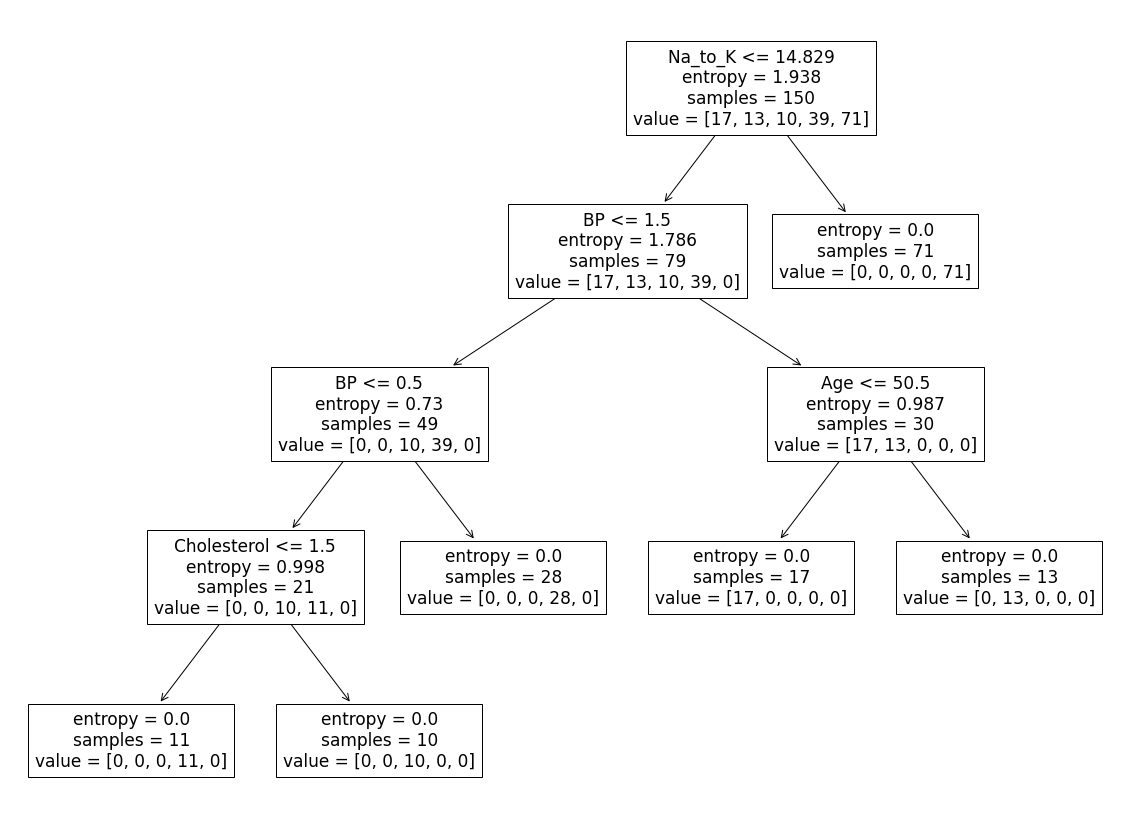

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15)) #resize figure
tree.plot_tree(model, feature_names=X.columns)       #plot

## Execute Pre-pruning
### Refit Model

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42, criterion = 'entropy',max_depth=3) #Create Instance
model = dt.fit(X_train, y_train)

### Recreate Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(X_test)

print(y_test.head())    #print true data
print(pred[0:5])        #print predictions

print()
print(confusion_matrix(y_test, pred)) #cm(true data, predictions)
print(accuracy_score(y_test, pred))   #am(true data, predictions)

95     3
15     4
30     3
158    2
128    4
Name: Drug, dtype: int64
[3 4 3 3 4]

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0 15  0]
 [ 0  0  0  0 20]]
0.88


### Revisualize

[Text(0.625, 0.875, 'Na_to_K <= 14.829\nentropy = 1.938\nsamples = 150\nvalue = [17, 13, 10, 39, 71]'),
 Text(0.5, 0.625, 'BP <= 1.5\nentropy = 1.786\nsamples = 79\nvalue = [17, 13, 10, 39, 0]'),
 Text(0.25, 0.375, 'BP <= 0.5\nentropy = 0.73\nsamples = 49\nvalue = [0, 0, 10, 39, 0]'),
 Text(0.125, 0.125, 'entropy = 0.998\nsamples = 21\nvalue = [0, 0, 10, 11, 0]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 0, 28, 0]'),
 Text(0.75, 0.375, 'Age <= 50.5\nentropy = 0.987\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 71\nvalue = [0, 0, 0, 0, 71]')]

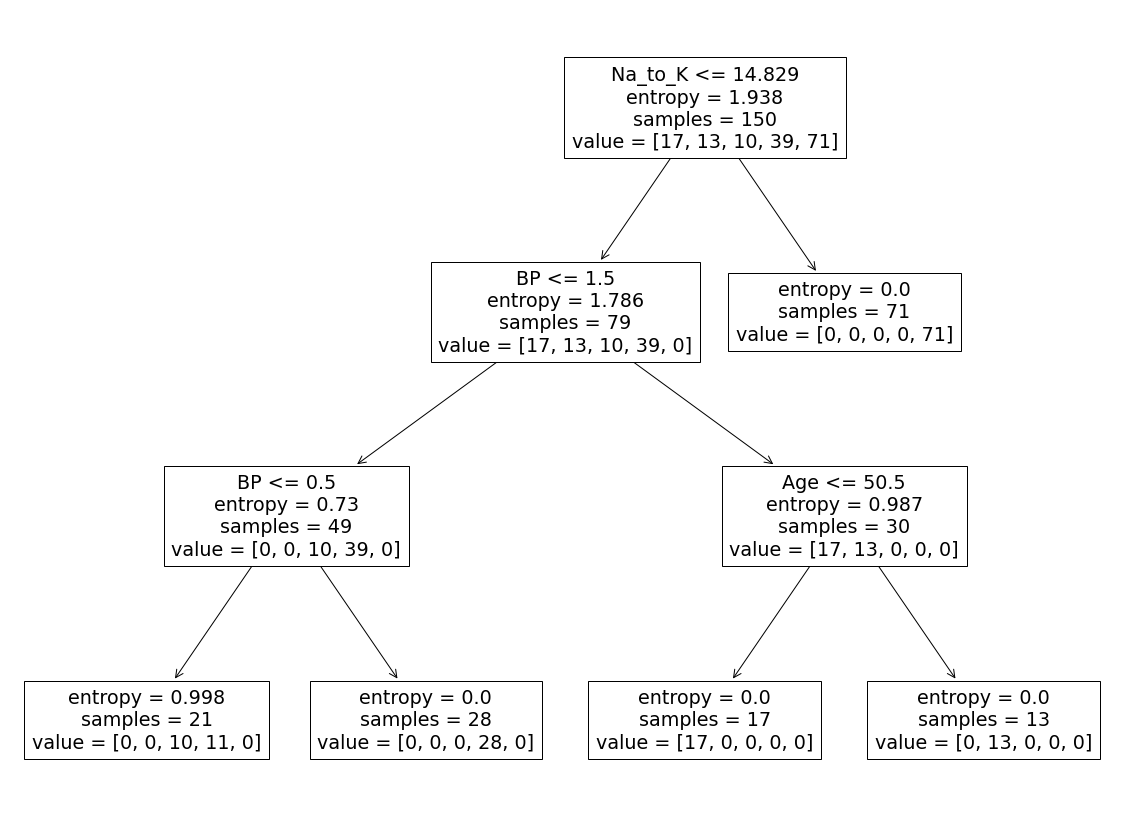

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15)) #resize figure
tree.plot_tree(model, feature_names=X.columns)       #plot

## Create Random Forest
### Fit Model

In [21]:
from sklearn.ensemble import RandomForestClassifier


'''
Select one of the following (comment out other):
'''

#With Entropy
rf = RandomForestClassifier(random_state=42, n_jobs=-1, criterion='entropy')

'''or'''

#Without Entropy
#rf = RandomForestClassifier(random_state=42, n_jobs=-1)

''' '''
model = rf.fit(X_train, y_train)

### Compare Prediction and Actual

In [22]:
pred = model.predict(X_test)
actual = y_test.head()

print(f'Prediction:\n{pred[0:5]}\n\nActual:\n{actual}')

print(confusion_matrix(y_test, pred))        #cm(true data, predictions)
print(accuracy_score(y_test, pred))          #as(true data, predictions)

Prediction:
[3 4 3 2 4]

Actual:
95     3
15     4
30     3
158    2
128    4
Name: Drug, dtype: int64
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 15  0]
 [ 0  0  0  0 20]]
1.0


In [23]:
#View Number of Trees
rf.n_estimators

100

### Revisualize

[Text(0.3806818181818182, 0.9375, 'BP <= 1.5\nentropy = 1.873\nsamples = 101\nvalue = [16, 17, 6, 35, 76]'),
 Text(0.18181818181818182, 0.8125, 'Na_to_K <= 14.574\nentropy = 1.259\nsamples = 62\nvalue = [0, 0, 6, 35, 51]'),
 Text(0.13636363636363635, 0.6875, 'BP <= 0.5\nentropy = 0.601\nsamples = 30\nvalue = [0, 0, 6, 35, 0]'),
 Text(0.09090909090909091, 0.5625, 'Cholesterol <= 1.5\nentropy = 0.971\nsamples = 12\nvalue = [0, 0, 6, 9, 0]'),
 Text(0.045454545454545456, 0.4375, 'entropy = 0.0\nsamples = 7\nvalue = [0, 0, 0, 9, 0]'),
 Text(0.13636363636363635, 0.4375, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 6, 0, 0]'),
 Text(0.18181818181818182, 0.5625, 'entropy = 0.0\nsamples = 18\nvalue = [0, 0, 0, 26, 0]'),
 Text(0.22727272727272727, 0.6875, 'entropy = 0.0\nsamples = 32\nvalue = [0, 0, 0, 0, 51]'),
 Text(0.5795454545454546, 0.8125, 'Cholesterol <= 1.5\nentropy = 1.555\nsamples = 39\nvalue = [16, 17, 0, 0, 25]'),
 Text(0.36363636363636365, 0.6875, 'Age <= 50.0\nentropy = 1.566\nsampl

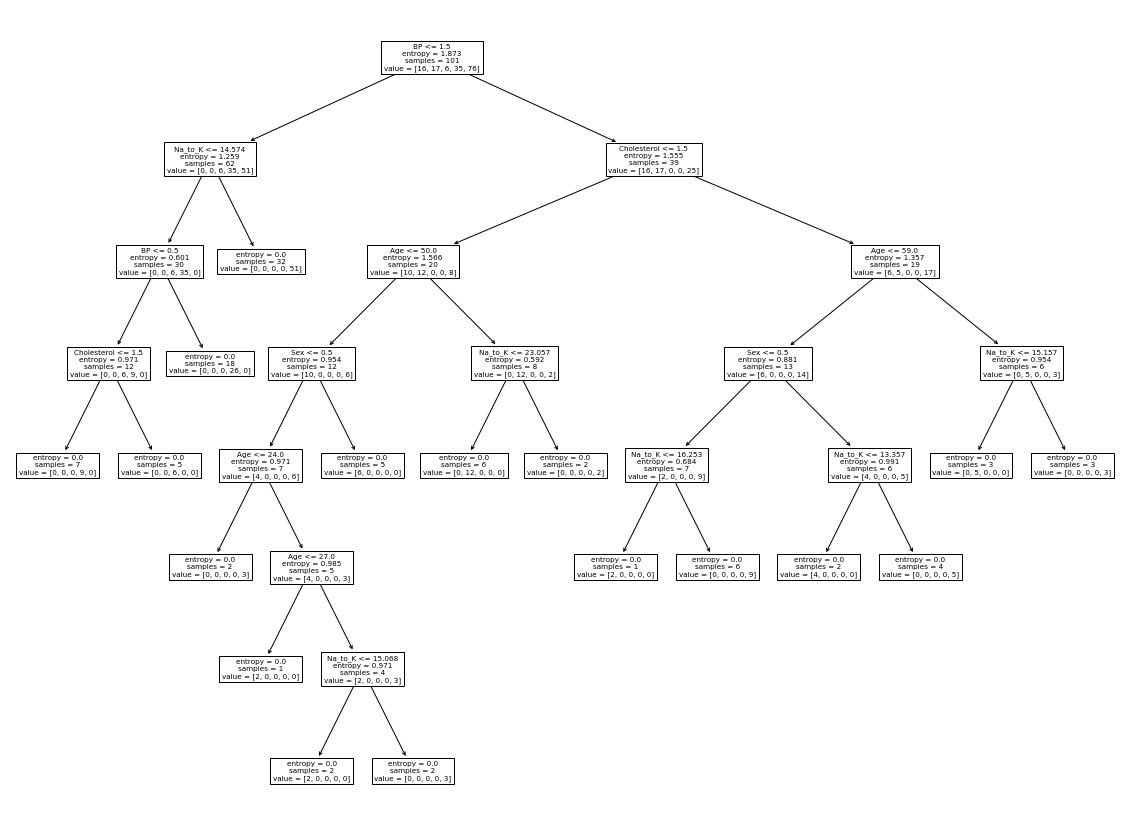

In [24]:
# Visualize Tree 1

plt.figure(figsize=(20,15)) #resize figure
tree.plot_tree(rf.estimators_[0], feature_names=X.columns)       #plot tree 1

[Text(0.6538461538461539, 0.9375, 'Na_to_K <= 14.839\nentropy = 1.938\nsamples = 91\nvalue = [24, 10, 7, 46, 63]'),
 Text(0.5769230769230769, 0.8125, 'Age <= 50.0\nentropy = 1.65\nsamples = 51\nvalue = [24, 10, 7, 46, 0]'),
 Text(0.3076923076923077, 0.6875, 'Cholesterol <= 1.5\nentropy = 1.349\nsamples = 34\nvalue = [24, 0, 6, 32, 0]'),
 Text(0.15384615384615385, 0.5625, 'BP <= 1.5\nentropy = 0.944\nsamples = 19\nvalue = [13, 0, 0, 23, 0]'),
 Text(0.07692307692307693, 0.4375, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 23, 0]'),
 Text(0.23076923076923078, 0.4375, 'entropy = 0.0\nsamples = 6\nvalue = [13, 0, 0, 0, 0]'),
 Text(0.46153846153846156, 0.5625, 'BP <= 1.5\nentropy = 1.543\nsamples = 15\nvalue = [11, 0, 6, 9, 0]'),
 Text(0.38461538461538464, 0.4375, 'Age <= 34.5\nentropy = 0.971\nsamples = 10\nvalue = [0, 0, 6, 9, 0]'),
 Text(0.3076923076923077, 0.3125, 'Age <= 22.5\nentropy = 0.684\nsamples = 7\nvalue = [0, 0, 2, 9, 0]'),
 Text(0.23076923076923078, 0.1875, 'BP <= 0.5\nentr

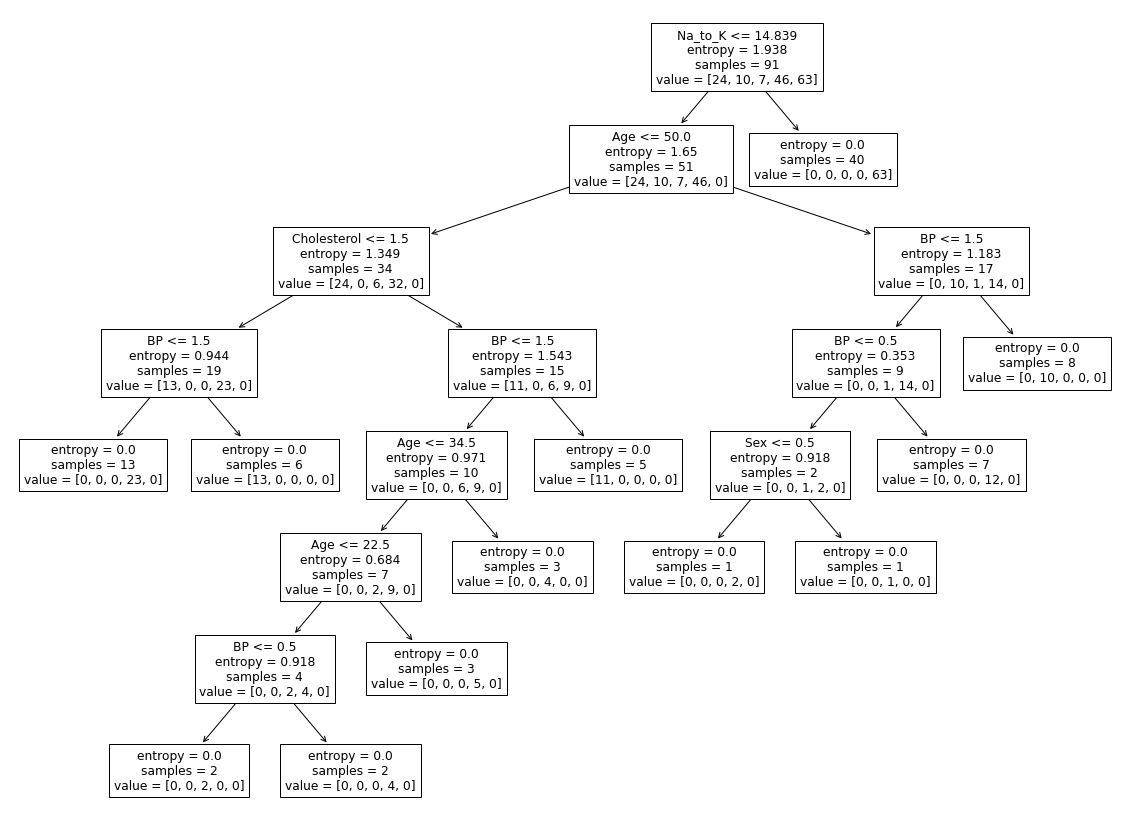

In [25]:
# Visualize Tree 100

plt.figure(figsize=(20,15)) #resize figure
tree.plot_tree(rf.estimators_[99], feature_names=X.columns)       #plot tree 1

### Set Out of bag (OOB) Score

In [26]:
'''
Displays the accuracy for all bootstrap samples as well. 
Idealy, you want accuracy and OOB to be similar.
'''

rf = RandomForestClassifier(random_state=42, n_jobs=-1, criterion='entropy', oob_score=True)
model = rf.fit(X_train, y_train)

model.oob_score_

0.98

## Calculate Feature Importance

In [27]:
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]        #sort by decending
names = [X_train.columns[i] for i in indices]  #obtain names from columns

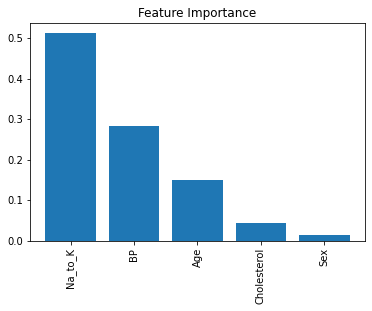

In [28]:
plt.figure()                      #create a new figure
plt.title("Feature Importance")   #set title
plt.bar(range(X_train.shape[1]), importances[indices])   #define bar plot
plt.xticks(range(X_train.shape[1]), names, rotation=90)  #define ticks/labels
plt.show()       #display